## WTWY NYC Street Team Deployment Analysis 
Emily Geller and Brian McMahon

### Executive Summary / Problem Statement
- Tasked with optimizing WTWY street team placement for raising awareness of upcoming gala
- Utilized NYC MTA and demographic data to perform analysis on areas with high traffic and favorable demographics
- Findings identified major traffic hubs where placement of street teams would be optimal based on surrounding population
- Recommended stations for mobilizing street teams include: Penn Station, Herald Square, Grand Central, Times Square and 23rd Street



### Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://data.ny.gov/Transportation/Turnstile-Usage-Data-2016/ekwu-khcy
# https://data.ny.gov/api/views/ekwu-khcy/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('Turnstile_Usage_Data__2016.csv',dtype={'C/A': str,'Unit':str,'SCP':str,'Station':str,'Line Name':str, 'Division':str,'Date': object, 'Time':object,'Description':str,'Entries':int,'Exits':int})
data = pd.DataFrame(data) # change to pandas dataframe
# parse spaces from columns  
data=data.rename(columns = {'Exits                                                     ':'Exits'})

In [3]:
# remove first few columns of turnstile data; not used in our analysis
data = data.iloc[:,3:]
data.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239
1,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206
2,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113
3,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031
4,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736


### Process Data

In [4]:
# Data presented as cumulative; add columns to track the increment
# Add Traffic_Tot column as sum of Entry and Exit to represent activity
data['Entry_Inc'] = abs(data.Entries.diff())
data['Exits_Inc'] = abs(data.Exits.diff())
data['Traffic_Tot'] = np.add(data.Entry_Inc, data.Exits_Inc)
data.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
0,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239,NaN,NaN,NaN
1,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206,343.0,33.0,376.0
2,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113,934.0,93.0,1027.0
3,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031,274.0,82.0,356.0
4,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736,140.0,295.0,435.0


In [5]:
# filter outliers above specified quantile
quant_filt = 0.99
q = data["Entry_Inc"].quantile(quant_filt)
data = data[data["Entry_Inc"] < q]

r = data["Exits_Inc"].quantile(quant_filt)
data = data[data["Exits_Inc"] < r]

s = data["Traffic_Tot"].quantile(quant_filt)
data = data[data["Traffic_Tot"] < s]

data = data.dropna() # apparently no issues with NaN cells; running as best practice

data.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
1,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206,343.0,33.0,376.0
2,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113,934.0,93.0,1027.0
3,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031,274.0,82.0,356.0
4,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736,140.0,295.0,435.0
5,59 ST,NQR456,BMT,03/04/2016,07:00:00,REGULAR,5571136,1880657,37.0,79.0,116.0


### Sort Data
Data is sorted by Station.

In [6]:
data_stn = data.groupby(["Station"]).sum() # sort by station
data_stn['Station_ID'] = data_stn.index # Make Station_ID a non-index column
data_stn = data_stn.sort_values(['Traffic_Tot'], ascending=[False]) # Sort stations by traffic
data_stn['Idx'] = np.arange(data_stn.shape[0]) # add enumerated column
data_stn = data_stn.set_index('Idx') # assign enumerated column as index column
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,6688304157199,3630511989854,43389327.0,35722750.0,79112077.0,34 ST-PENN STA
1,12665339112269,11696989712585,31416768.0,23977529.0,55394297.0,23 ST
2,5847951627430,6098512500597,27860423.0,24614007.0,52474430.0,34 ST-HERALD SQ
3,11539236191101,9178257398340,25838571.0,23245722.0,49084293.0,TIMES SQ-42 ST
4,7901555330882,2052315189136,25151182.0,22764739.0,47915921.0,GRD CNTRL-42 ST


## Prep Data for Charting

In [7]:
import seaborn as sns
sns.set_style("whitegrid")

In [8]:
data_stn = data_stn.iloc[:20,:] # limit to 20 most active stations
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,6688304157199,3630511989854,43389327.0,35722750.0,79112077.0,34 ST-PENN STA
1,12665339112269,11696989712585,31416768.0,23977529.0,55394297.0,23 ST
2,5847951627430,6098512500597,27860423.0,24614007.0,52474430.0,34 ST-HERALD SQ
3,11539236191101,9178257398340,25838571.0,23245722.0,49084293.0,TIMES SQ-42 ST
4,7901555330882,2052315189136,25151182.0,22764739.0,47915921.0,GRD CNTRL-42 ST


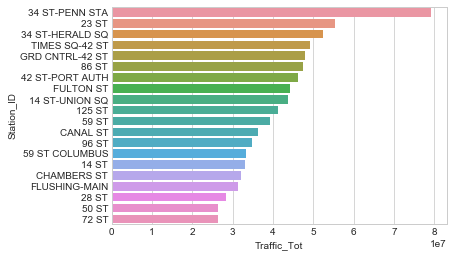

In [9]:
# verify results: check http://web.mta.info/nyct/facts/ffsubway.htm
ax = sns.barplot(x="Traffic_Tot", y='Station_ID', data=data_stn)
# to confirm that 23rd St is a top station.  With more time, would
# further analyze top stations for outliers.
plt.show()

### Top Station Activity: Penn Station 34th Street

In [10]:
data_stndate = data.groupby([ "Station", "Date"]).sum() # sort by station and date
data_stndate.reset_index(inplace=True) # remove Station and Date columns from Index
data_stndate['Date'] = pd.to_datetime(data_stndate['Date']) # change Date dtype to datetime
data_stndate.head()

,Station,Date,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
0,1 AV,2016-01-02,8446763163,8816182716,16816.0,18856.0,35672.0
1,1 AV,2016-01-03,8446860211,8816289298,12942.0,13808.0,26750.0
2,1 AV,2016-01-04,8360994609,8720116887,16601.0,16539.0,33140.0
3,1 AV,2016-01-05,8306184305,8684658647,15213.0,16666.0,31879.0
4,1 AV,2016-01-06,8306899059,8693492544,16506.0,18685.0,35191.0


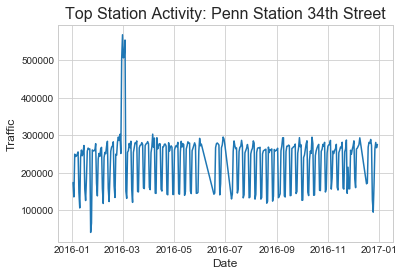

In [11]:
data_Penn = data_stndate[data_stndate['Station'] == '34 ST-PENN STA'] # filter to date by specific station

y = pd.Series(data_Penn['Traffic_Tot'])
x = pd.Series(data_Penn['Date'])

plt.plot(x,y)
plt.title("Top Station Activity: Penn Station 34th Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.show()

### Top Station Activity: 23rd St

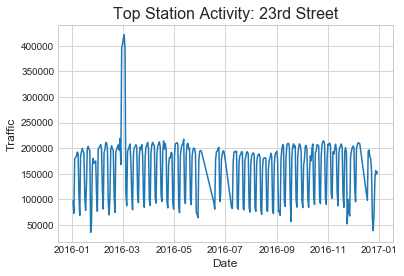

In [12]:
data_23ST = data_stndate[data_stndate['Station'] == '23 ST']

y = pd.Series(data_23ST['Traffic_Tot'])
x = pd.Series(data_23ST['Date'])

plt.plot(x,y)
plt.title("Top Station Activity: 23rd Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.show()

### Top Station Activity: Herald Square 34th Street

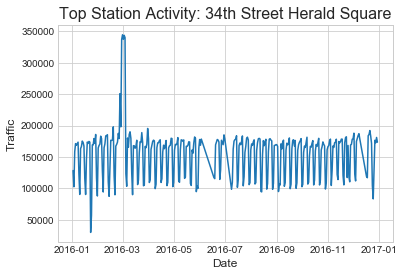

In [13]:
data_34ST = data_stndate[data_stndate['Station'] == '34 ST-HERALD SQ']

y = pd.Series(data_34ST['Traffic_Tot'])
x = pd.Series(data_34ST['Date'])

plt.plot(x,y)
plt.title("Top Station Activity: 34th Street Herald Square",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.show()

### Top Station Activity: Times Square 42nd St

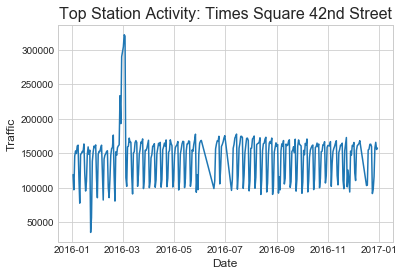

In [14]:
data_TSQ = data_stndate[data_stndate['Station'] == 'TIMES SQ-42 ST']

y = pd.Series(data_TSQ['Traffic_Tot'])
x = pd.Series(data_TSQ['Date'])

plt.plot(x,y)
plt.title("Top Station Activity: Times Square 42nd Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.show()

### Top Station Activity: Grand Central 42nd St

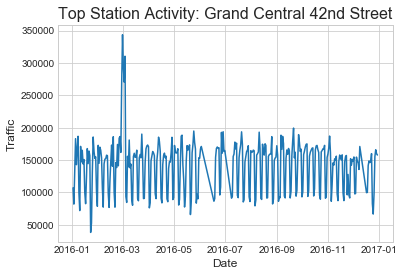

In [15]:
data_GRD = data_stndate[data_stndate['Station'] == 'GRD CNTRL-42 ST']

y = pd.Series(data_GRD['Traffic_Tot'])
x = pd.Series(data_GRD['Date'])

plt.plot(x,y)
plt.title("Top Station Activity: Grand Central 42nd Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.show()

### Top Station Activity: 72nd St (#20, for comparison purposes)

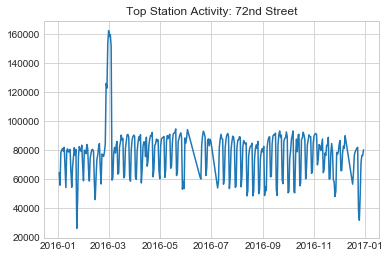

In [16]:
data_72ST = data_stndate[data_stndate['Station'] == '72 ST']
y = pd.Series(data_72ST['Traffic_Tot'])
x = pd.Series(data_72ST['Date'])

plt.plot(x,y)
plt.title("Top Station Activity: 72nd Street")
plt.show()

## Demographics Analysis

Data sourced from : https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data/data

census_block_loc.csv was orginally sourced from: https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml 

total population, racial/ethnic demographic information, employment and commuting characteristics, and more are contained here
nyc_census_tracts.csv was originally sourced from: https://www.fcc.gov/general/census-block-conversions-api

This file contains the coordinates and associated census block codes along with the state and county names

In [17]:
blocks_map = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('nyc_census_tracts.csv', index_col=0)

In [18]:
blocks_map.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [19]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [20]:
census.County.unique()

array(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], dtype=object)

Combine both tables on Block Code. (Tract is the first 11 digits BlockCode)

In [21]:
blocks_map = blocks_map[blocks_map.County.isin(['Bronx','Kings','New York','Queens', 'Richmond'])]
blocks_map['Tract'] = blocks_map.BlockCode // 10000
blocks_map['Tract'] = blocks_map.BlockCode // 10000
blocks_map = blocks_map.merge(census,how='left',right_index=True,left_on='Tract')

blocks_map.describe()

,Latitude,Longitude,BlockCode,Tract,TotalPop,Men,Women,Hispanic,White,Black,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,18053.000000,18053.000000,1.805300e+04,1.805300e+04,18052.000000,18052.000000,18052.000000,12999.000000,12999.000000,12999.000000,...,12777.000000,12777.000000,12777.000000,11864.000000,18052.000000,12777.000000,12777.000000,12777.000000,12777.000000,12830.000000
mean,40.663945,-73.938191,3.606427e+14,3.606427e+10,2911.090682,1411.314591,1499.776091,23.607047,42.815132,19.688084,...,6.684503,1.955193,4.175033,41.353911,1326.003601,78.087822,16.350239,5.449339,0.114229,8.783001
std,0.108223,0.130486,2.647918e+11,2.647918e+07,2963.959357,1433.417834,1570.619628,21.308169,33.096275,27.271547,...,9.074818,3.704082,7.743335,6.959058,1413.643704,8.654013,8.628300,4.719631,0.405476,8.350183
min,40.480000,-74.257839,3.600500e+14,3.600500e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.200000,0.000000,38.600000,0.000000,0.000000,0.000000,0.000000
25%,40.572714,-74.020402,3.604707e+14,3.604707e+10,0.000000,0.000000,0.000000,7.700000,8.300000,0.900000,...,1.200000,0.000000,1.200000,37.400000,0.000000,73.600000,10.500000,2.800000,0.000000,5.000000
50%,40.645075,-73.915930,3.608106e+14,3.608106e+10,2627.000000,1318.000000,1346.000000,16.600000,44.600000,5.100000,...,4.000000,1.000000,2.500000,41.500000,1165.000000,78.200000,15.900000,4.900000,0.000000,7.500000
75%,40.746834,-73.836784,3.608199e+14,3.608199e+10,4586.000000,2214.000000,2382.000000,32.100000,71.200000,28.300000,...,8.200000,2.300000,4.700000,45.700000,2077.000000,83.200000,21.300000,7.300000,0.000000,11.000000
max,40.916432,-73.700653,3.608599e+14,3.608599e+10,28926.000000,13460.000000,15466.000000,100.000000,100.000000,100.000000,...,100.000000,55.600000,100.000000,70.500000,12780.000000,100.000000,53.700000,61.400000,3.900000,100.000000


### Plot Demographics Data

The following code was found here: https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data/notebook.
We use this to map demographic information.

In [22]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [23]:
def make_plot(blocks, data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig, ax = plt.subplots(figsize = [12,12])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = ax.imshow(values.T,origin='lower',cmap=colors,extent=limits, zorder = 1)
    ax.autoscale(False)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    plt.show()

#### Median Household Income by Lat/Long

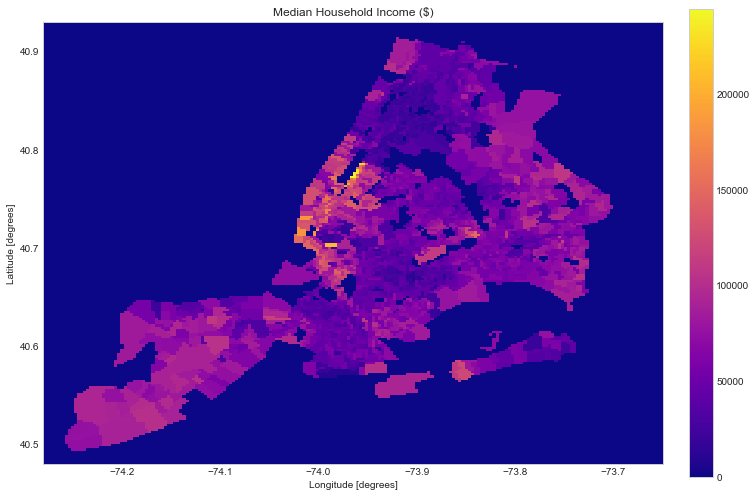

In [24]:
make_plot(blocks_map, blocks_map.Income,colors='plasma',title='Median Household Income ($)')

#### Percentage of Population Taking Public Transportation to Work

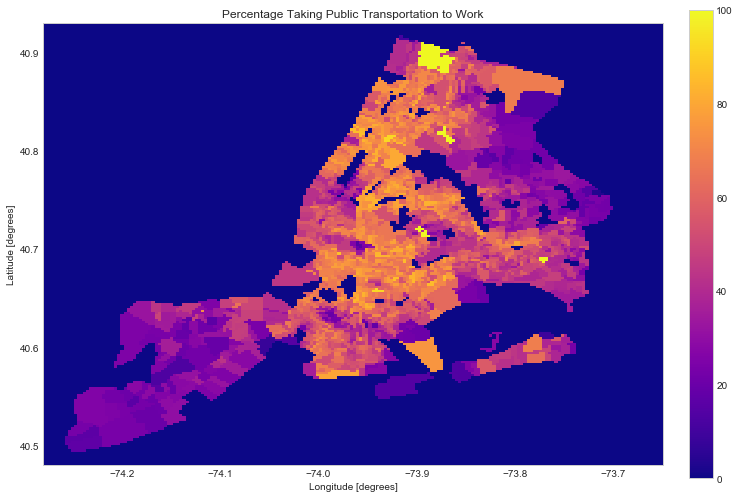

In [25]:
make_plot(blocks_map, blocks_map.Transit,colors='plasma',title='Percentage Taking Public Transportation to Work')

#### Female Population Concentrations by Lat/Long

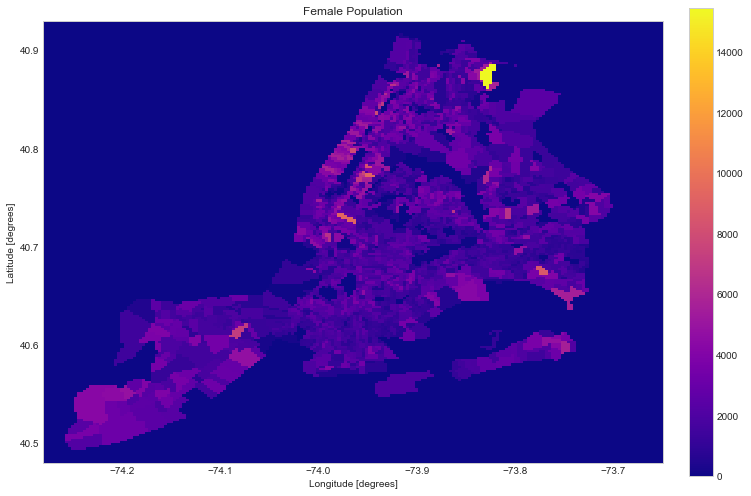

In [26]:
make_plot(blocks_map, blocks_map.Women,colors='plasma',title='Female Population')

### Further Analysis
Limit the data included in the dataframe to only include those demographics that we are interested in (number of Women, Total Population, Percentage of Population taking Public Transportatin and Median Household Income).

In [27]:
filtered_blocks = blocks_map[['Latitude', 'Longitude', 'BlockCode', 'County_x', 'Women', 'TotalPop', 'Transit', 'Income']]

Create a new column holding the percentage of the population who are female.

In [28]:
filtered_blocks['women_pop_perc'] = np.divide(np.array(filtered_blocks['Women'], int),np.array(filtered_blocks['TotalPop'],int))

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
filtered_blocks.describe()

,Latitude,Longitude,BlockCode,Women,TotalPop,Transit,Income,women_pop_perc
count,18053.000000,18053.000000,1.805300e+04,18052.000000,18052.000000,12777.000000,11947.000000,13000.000000
mean,40.663945,-73.938191,3.606427e+14,1499.776091,2911.090682,44.844486,66464.034737,0.513941
std,0.108223,0.130486,2.647918e+11,1570.619628,2963.959357,20.761257,26952.609291,0.101982
min,40.480000,-74.257839,3.600500e+14,0.000000,0.000000,0.000000,9829.000000,0.000000
25%,40.572714,-74.020402,3.604707e+14,0.000000,0.000000,27.200000,45991.000000,0.489385
50%,40.645075,-73.915930,3.608106e+14,1346.000000,2627.000000,44.200000,66250.000000,0.515745
75%,40.746834,-73.836784,3.608199e+14,2382.000000,4586.000000,62.200000,84559.000000,0.544983
max,40.916432,-73.700653,3.608599e+14,15466.000000,28926.000000,100.000000,244375.000000,1.000000


Top 10 Stations

In [30]:
top_10 = data_stn.head(10)
top_10

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,6688304157199,3630511989854,43389327.0,35722750.0,79112077.0,34 ST-PENN STA
1,12665339112269,11696989712585,31416768.0,23977529.0,55394297.0,23 ST
2,5847951627430,6098512500597,27860423.0,24614007.0,52474430.0,34 ST-HERALD SQ
3,11539236191101,9178257398340,25838571.0,23245722.0,49084293.0,TIMES SQ-42 ST
4,7901555330882,2052315189136,25151182.0,22764739.0,47915921.0,GRD CNTRL-42 ST
5,4717863457538,5054584156147,27976770.0,19524148.0,47500918.0,86 ST
6,15015687906877,12431372573038,27764853.0,18504967.0,46269820.0,42 ST-PORT AUTH
7,8246409562531,8555427124598,24449068.0,19832307.0,44281375.0,FULTON ST
8,2393981063586,758394530095,22754780.0,21055089.0,43809869.0,14 ST-UNION SQ


In [31]:
top_10['Latitude'] = [40.7520, 40.7427, 40.7496, 40.7553, 40.7527, 40.4640, 40.7572, 40.7094, 40.4429, 40.8049]
top_10['Longitude'] = [-73.9933, -73.9926, -73.9877, -73.9869, -73.9772, -73.5706, -73.9898, -74.0083, -73.5914, -73.9385]

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
top_10

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID,Latitude,Longitude
Idx,,,,,,,,
0,6688304157199,3630511989854,43389327.0,35722750.0,79112077.0,34 ST-PENN STA,40.7520,-73.9933
1,12665339112269,11696989712585,31416768.0,23977529.0,55394297.0,23 ST,40.7427,-73.9926
2,5847951627430,6098512500597,27860423.0,24614007.0,52474430.0,34 ST-HERALD SQ,40.7496,-73.9877
3,11539236191101,9178257398340,25838571.0,23245722.0,49084293.0,TIMES SQ-42 ST,40.7553,-73.9869
4,7901555330882,2052315189136,25151182.0,22764739.0,47915921.0,GRD CNTRL-42 ST,40.7527,-73.9772
5,4717863457538,5054584156147,27976770.0,19524148.0,47500918.0,86 ST,40.4640,-73.5706
6,15015687906877,12431372573038,27764853.0,18504967.0,46269820.0,42 ST-PORT AUTH,40.7572,-73.9898
7,8246409562531,8555427124598,24449068.0,19832307.0,44281375.0,FULTON ST,40.7094,-74.0083
8,2393981063586,758394530095,22754780.0,21055089.0,43809869.0,14 ST-UNION SQ,40.4429,-73.5914


### Demographics in half square mile around 34 - Penn St Station
40.7520	-73.9933

In [33]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.753) & (filtered_blocks['Latitude'] > 40.751))&((filtered_blocks['Longitude']>-73.995)&(filtered_blocks['Longitude']<-73.991))]#.describe()

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22487,40.751357,-73.99191,360610101001002,New York,501.0,1259.0,41.1,159821.0,0.397935


### Demographics in half square around 23 St Station
40.7427	-73.9926

In [34]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.755) & (filtered_blocks['Latitude'] > 40.753))&((filtered_blocks['Longitude']>-73.993)&(filtered_blocks['Longitude']<-73.991))]#.describe()

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22687,40.753618,-73.99191,360610109001003,New York,113.0,186.0,48.4,135750.0,0.607527


## Demographics in half square mile around 34 St - Herald Sq
40.7496	-73.9877

In [35]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.750) & (filtered_blocks['Latitude'] > 40.747))&((filtered_blocks['Longitude']>-73.986)&(filtered_blocks['Longitude']<-73.984))]

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22289,40.749095,-73.985578,360610076001000,New York,1069.0,1912.0,36.5,103264.0,0.5591


## Demographics in half square mile around Grand Central 42nd St	
40.7527	-73.9772

In [36]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.754) & (filtered_blocks['Latitude'] > 40.752))&((filtered_blocks['Longitude']>-73.977)&(filtered_blocks['Longitude']<-73.976))]

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22692,40.753618,-73.97608,360610092001008,New York,895.0,1717.0,37.2,122379.0,0.521258


## Demographic in half square mile around Times Sq 42nd St	
40.7553	-73.9869

In [37]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.756) & (filtered_blocks['Latitude'] > 40.754))&((filtered_blocks['Longitude']>-73.989)&(filtered_blocks['Longitude']<-73.986))]

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22888,40.755879,-73.988744,360610113001003,New York,30.0,126.0,44.4,82361.0,0.238095


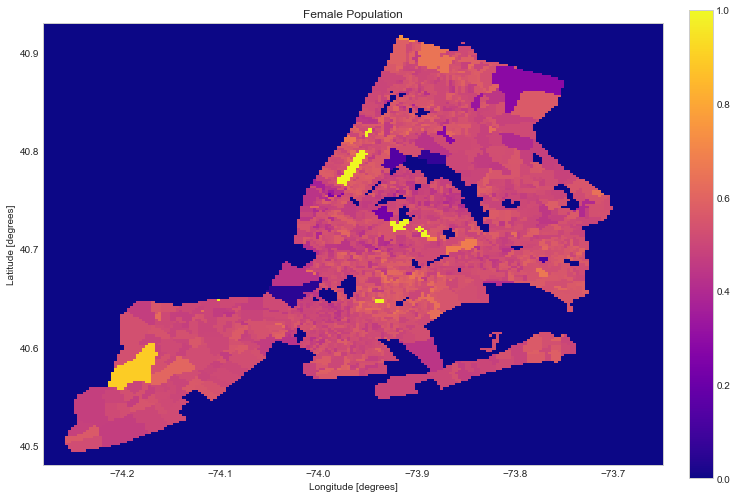

In [38]:
make_plot(filtered_blocks, filtered_blocks.women_pop_perc,colors='plasma',title='Female Population')